In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Users\vanantharamu\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\vanantharamu\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
data = pd.read_csv('bank-full.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.shape

(45211, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

<span style='color:Purple'> There are no null values or NAs in the dataset. 

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


<span style='color:Purple'> **'balance'** has negative values which is possible. 
But the data seems right skewed as the 75% values is very small compared
to the maximum value

<span style='color:Purple'>**'pdays'** **'previous'**  **'campaign'** **'duration'** also seems very right-skewed.

In [7]:
data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [8]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

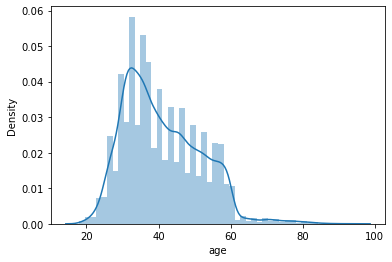

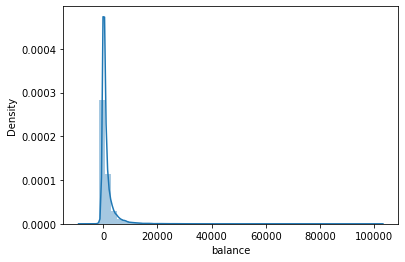

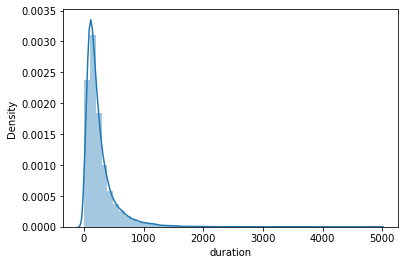

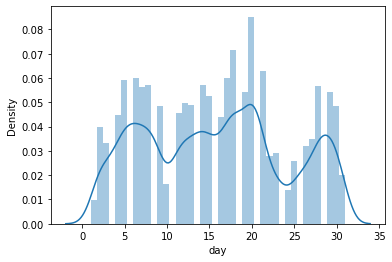

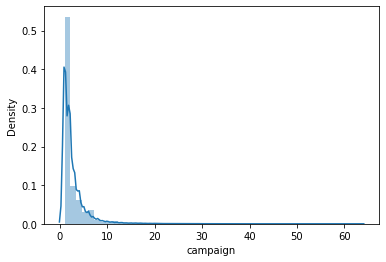

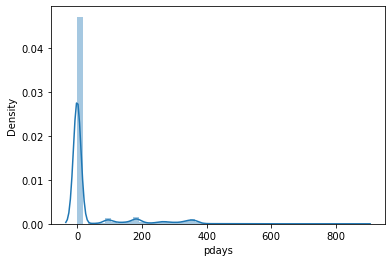

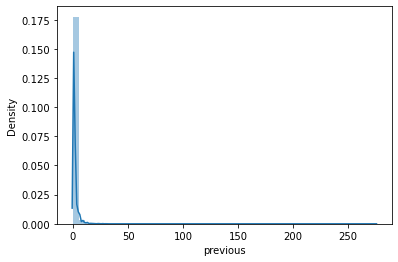

In [9]:
for i in ['age', 'balance', 'duration', 'day', 'campaign', 'pdays', 'previous']:
    sns.distplot(data[i])
    plt.show()

In [10]:
test = data [data['pdays'] <0]
test.Target.value_counts()

no     33570
yes     3384
Name: Target, dtype: int64

In [11]:
test = data [data['pdays'] >0]
test.Target.value_counts()

no     6352
yes    1905
Name: Target, dtype: int64

<span style='color:purple'>Even though pdays is highly skewed, it has information on our 'Target' variable when it has -1 or real values

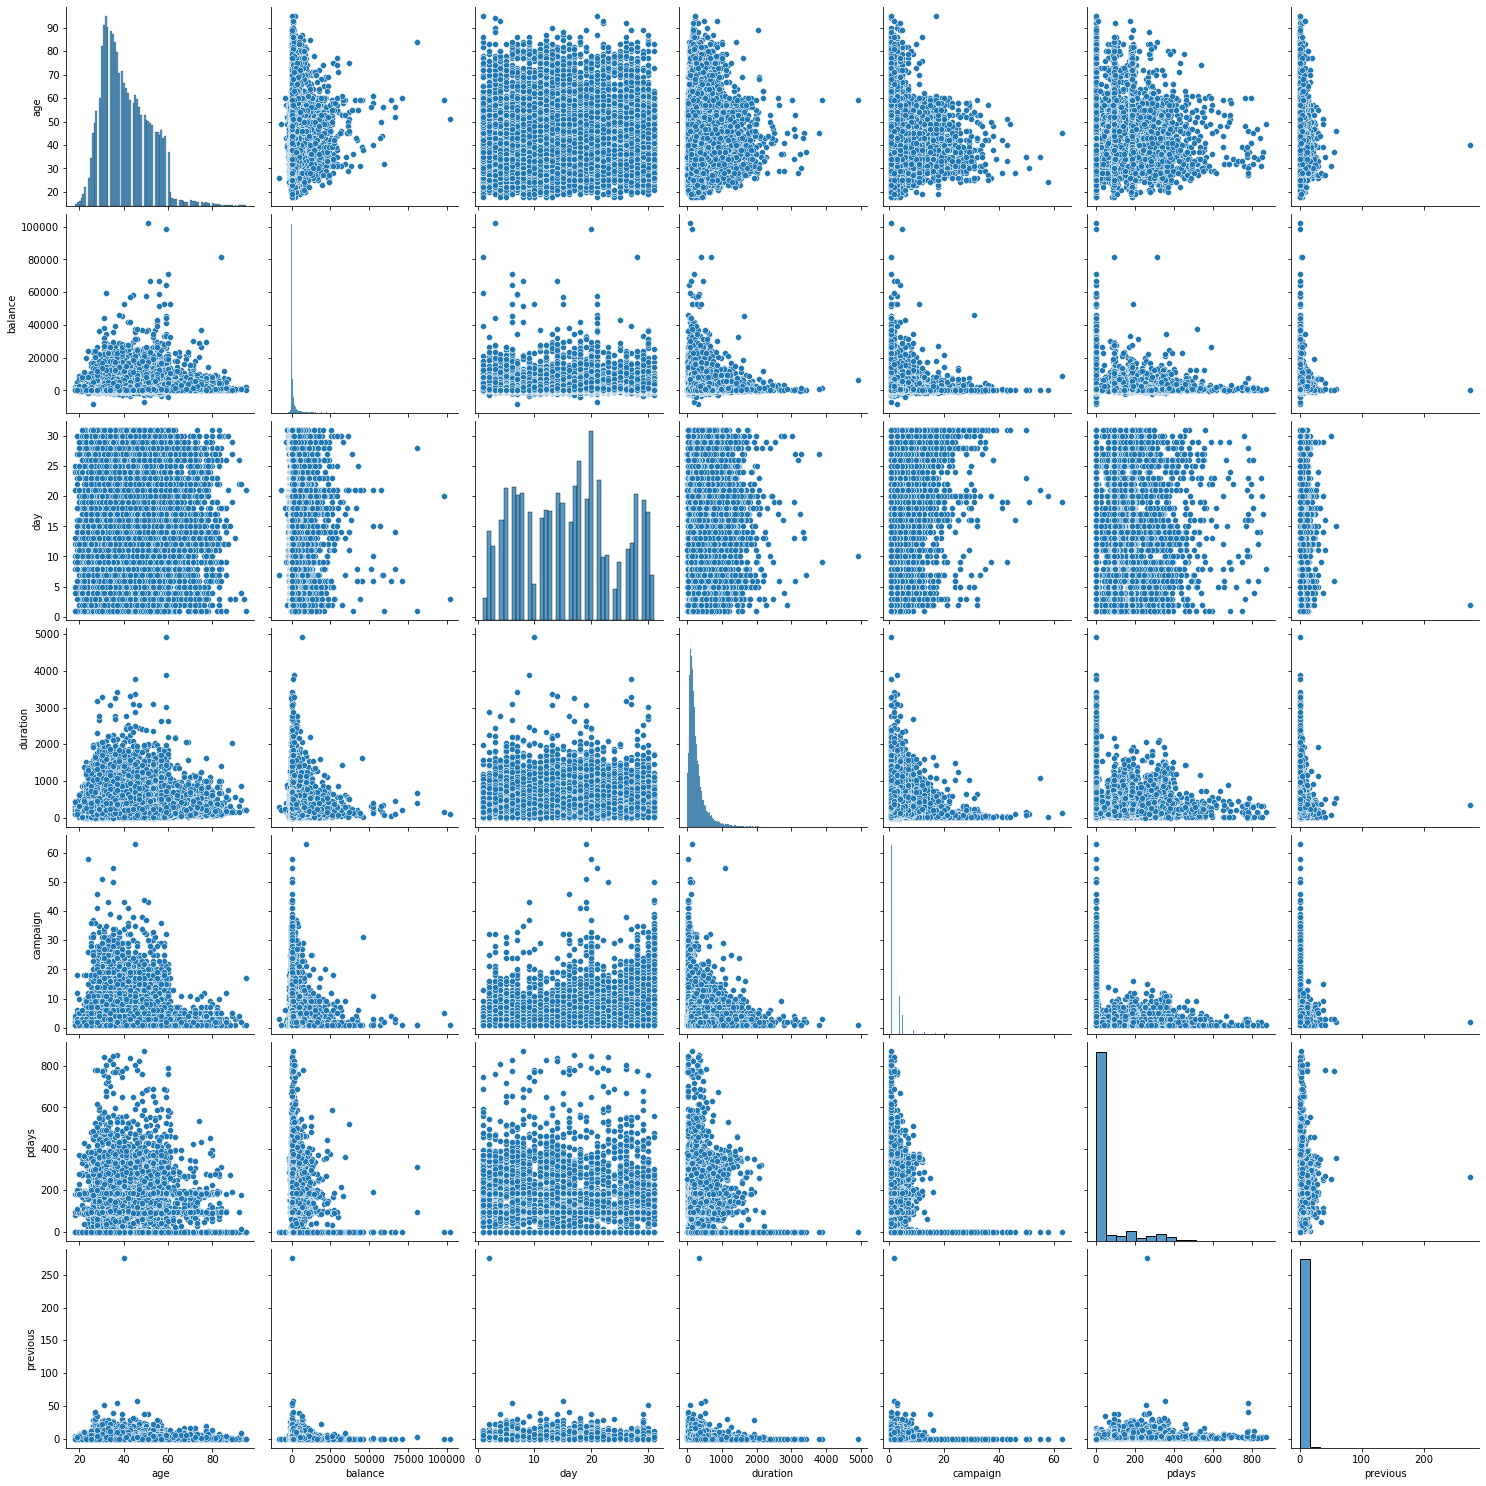

In [12]:
sns.pairplot(data, height=3, diag_kind='auto')
plt.show()

<span style='color:purple'> We see one single data point as an outlier in 'previous' column

In [13]:
data [data['previous'] > 200]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
29182,40,management,married,tertiary,no,543,yes,no,cellular,2,feb,349,2,262,275,other,no


In [14]:
data.previous.value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64

<span style = 'color:Purple'> We can see that most of the data has duration less than 58 except for one single value which has 275. It doesnt make sense that only 1 person has been contacted 275 times!

<span style = 'color:purple'>We can also see that 36954 data points have a value of zero which is the mode for the column. Hence I will be replacing 275 with zero. 

In [15]:
data.iloc[29182, 14] = 0

In [16]:
data [data['previous'] > 200]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target


#### Other outliers in the data

In [17]:
data[data['campaign'] > 45]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
4299,30,management,single,tertiary,no,358,yes,no,unknown,19,may,88,51,-1,0,unknown,no
4330,45,management,married,unknown,no,9051,yes,no,unknown,19,may,124,63,-1,0,unknown,no
5073,35,technician,married,secondary,no,432,yes,no,unknown,21,may,1094,55,-1,0,unknown,no
5459,35,blue-collar,married,secondary,no,430,yes,no,unknown,23,may,147,50,-1,0,unknown,no
10697,28,blue-collar,single,secondary,no,235,yes,no,unknown,16,jun,102,46,-1,0,unknown,no
11914,24,technician,single,primary,no,126,yes,no,unknown,20,jun,10,58,-1,0,unknown,no
18713,35,blue-collar,married,secondary,no,280,yes,yes,cellular,31,jul,65,50,-1,0,unknown,no


In [18]:
data[data['balance'] > 60000]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
19420,59,admin.,married,unknown,no,64343,no,no,cellular,6,aug,45,4,-1,0,unknown,no
19785,56,management,divorced,tertiary,no,66721,no,no,cellular,8,aug,442,2,-1,0,unknown,no
21192,52,blue-collar,married,primary,no,66653,no,no,cellular,14,aug,109,3,-1,0,unknown,no
26227,59,management,married,tertiary,no,98417,no,no,telephone,20,nov,145,5,-1,0,unknown,no
39989,51,management,single,tertiary,no,102127,no,no,cellular,3,jun,90,1,-1,0,unknown,no
41693,60,retired,married,primary,no,71188,no,no,cellular,6,oct,205,1,-1,0,unknown,no
42558,84,retired,married,secondary,no,81204,no,no,telephone,28,dec,679,1,313,2,other,yes
43393,84,retired,married,secondary,no,81204,no,no,telephone,1,apr,390,1,94,3,success,yes


<span style='color:Purple' >Even though these are the outliers, I do not see anything wrong with the data. 
I will be keeping them as is.

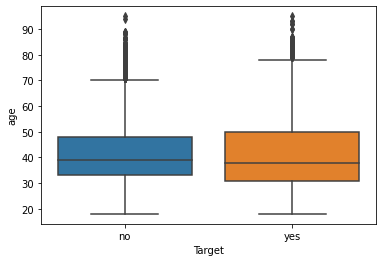

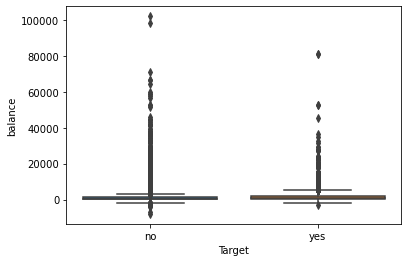

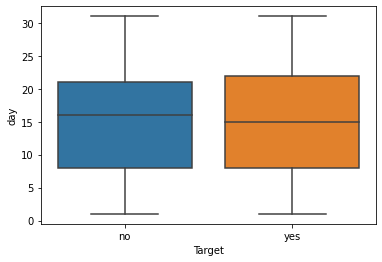

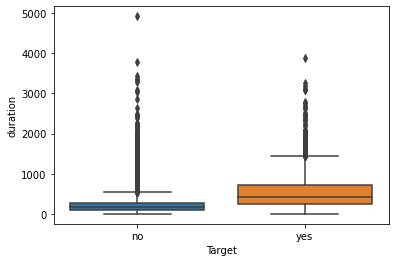

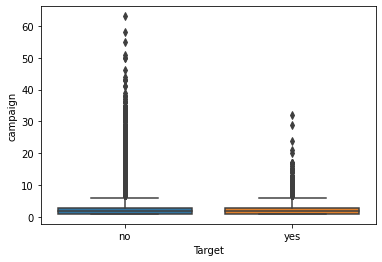

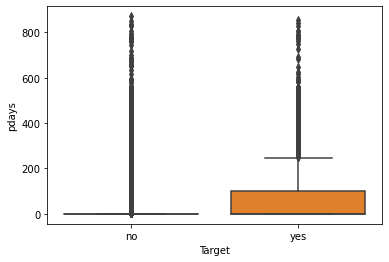

In [19]:
for i in ['age', 'balance', 'day', 'duration', 'campaign', 'pdays']:
    sns.boxplot (data['Target'], data[i])
    plt.show()

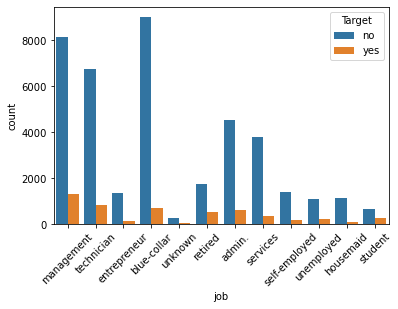

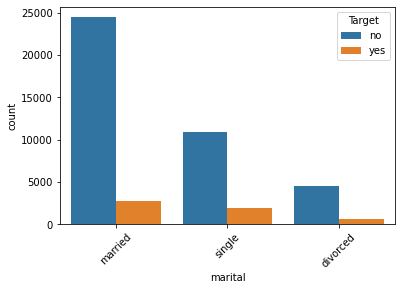

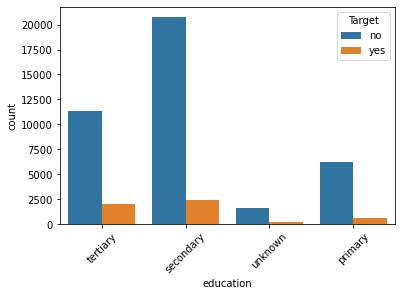

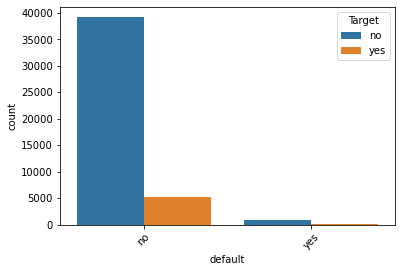

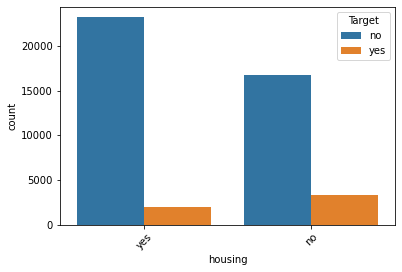

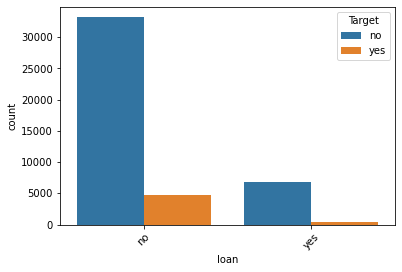

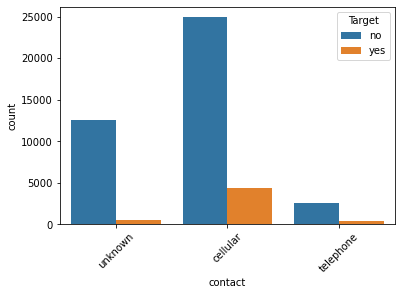

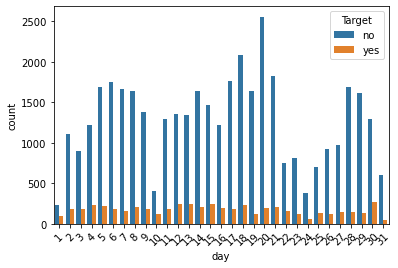

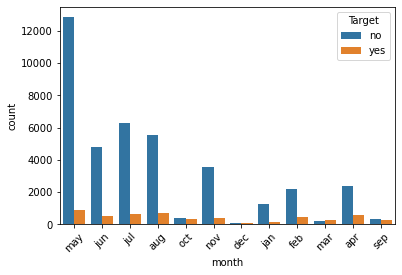

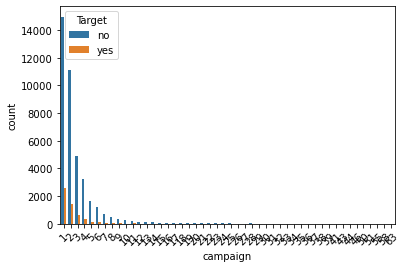

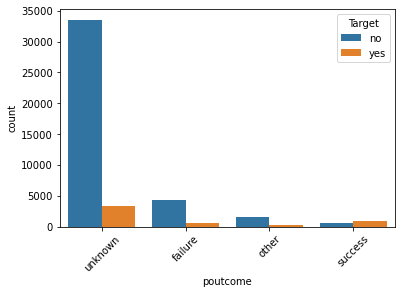

In [20]:
for i in ['job', 'marital', 'education', 'default','housing','loan', 'contact', 'day', 'month',  'campaign', 'poutcome']:
    sns.countplot (data[i], hue = data['Target'])
    plt.xticks(rotation=45)
    plt.show()

<span style = 'color:Purple'> More people in management seems to have subscribed for a term deposit compared to any other job. 

<span style = 'color:Purple'> Married people have subscribed more compared to singles and divorced. 
Secondary and tertiary educated people have said yes to compared to others. 
People with no default and no loan has taken the term deposit more. 
Most of the 'yes' seems to have come from the cellular contact method. 
May, July, August, and April seem to be the months where most people have accepted. 
    
<span style = 'color:Purple'> Even though we see this correlation, we should keep in mind that the population is also high for the categories where we see bigger values of 'yes'.

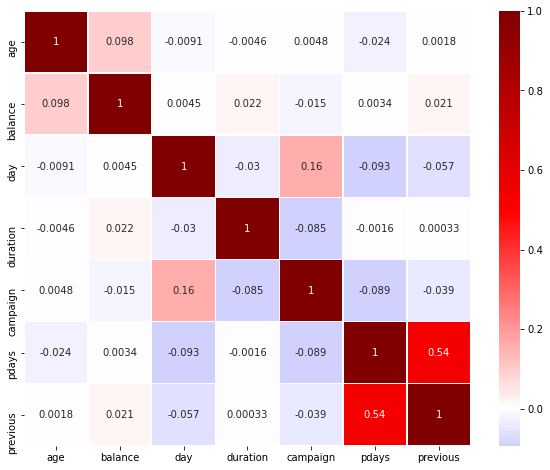

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=True,
            cmap="seismic")
plt.show()

<span style = 'color:Purple'>There are no strong positive or negative correlation/relationship between any of the continuous variables among each other. The highest being 0.54 between pdays vs previous.

In [22]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [23]:
data_drop = data.drop(['day'], axis =1)

<span style= 'color:Purple'> Dropping Day column as there is no strong correlation with the target variable. Also, using this variable will create 30 more columns and computationally it becomes time consuming. If year was given then maybe it could have been used. 

<span style= 'color:Purple'> Instead of month, I will be combining them and creating four quarters of an year. 

In [24]:
data_drop['quarters'] = data_drop['month']

In [25]:
data_drop.quarters.replace (['jan','feb','mar'],'first', inplace=True)
data_drop.quarters.replace (['apr','may','jun'],'second', inplace=True)
data_drop.quarters.replace (['jul','aug','sep'],'third', inplace=True)
data_drop.quarters.replace (['oct','nov','dec'],'fourth', inplace=True)

In [26]:
data_drop.drop('month', axis =1, inplace=True)
data_drop.quarters.unique()

array(['second', 'third', 'fourth', 'first'], dtype=object)

In [27]:
data_drop['job'] = data_drop['job'].astype('category')
data_drop['marital'] = data_drop['marital'].astype('category')
data_drop['education'] = data_drop['education'].astype('category')
data_drop['default'] = data_drop['default'].astype('category')
data_drop['housing'] = data_drop['housing'].astype('category')
data_drop['loan'] = data_drop['loan'].astype('category')
data_drop['contact'] = data_drop['contact'].astype('category')
data_drop['quarters'] = data_drop['quarters'].astype('category')
data_drop['poutcome'] = data_drop['poutcome'].astype('category')
data_drop['Target'] = data_drop['Target'].astype('category')

In [28]:
data_drop.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target       category
quarters     category
dtype: object

In [29]:
df = pd.get_dummies (data_drop, columns = ['job', 'marital','education','default', 
                                           'housing', 'loan', 'contact', 
                                           'poutcome', 'quarters'] , drop_first=True) 
df.head()

,age,balance,duration,campaign,pdays,previous,Target,job_blue-collar,job_entrepreneur,job_housemaid,...,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,quarters_fourth,quarters_second,quarters_third
0,58,2143,261,1,-1,0,no,0,0,0,...,1,0,0,1,0,0,1,0,1,0
1,44,29,151,1,-1,0,no,0,0,0,...,1,0,0,1,0,0,1,0,1,0
2,33,2,76,1,-1,0,no,0,1,0,...,1,1,0,1,0,0,1,0,1,0
3,47,1506,92,1,-1,0,no,1,0,0,...,1,0,0,1,0,0,1,0,1,0
4,33,1,198,1,-1,0,no,0,0,0,...,0,0,0,1,0,0,1,0,1,0


#### Creating variables and splitting data for training and testing

In [30]:
X = df.drop('Target', axis =1 )
Y1 = df['Target']
Y = Y1.replace(to_replace=['no', 'yes'], value=[0, 1])

<span style='color:Purple'> To help with the computations, I have changed no to zero and yes to 1. 

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                     test_size=0.3, random_state=1)

In [32]:
y_train.value_counts(normalize=True)

0    0.881885
1    0.118115
Name: Target, dtype: float64

In [33]:
y_test.value_counts(normalize=True)

0    0.885653
1    0.114347
Name: Target, dtype: float64

<span style= 'color:Purple'>The split is balanced w.r.t 'yes'(1s) and 'no' (0s) values of the target variable

#### Logistic Regression

In [34]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=1)
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y_predict_logistic = logreg.predict(X_test) 

In [36]:
Results = pd.DataFrame({'Observed Target': y_test, 'Predicted - Logistic': y_predict_logistic})

In [37]:
def draw_cm (actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot = True, fmt = '0.2f')
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Confusion Matrix



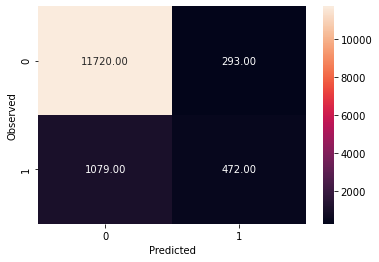

None


In [38]:
print ('Confusion Matrix')
print()
print(draw_cm(y_test, y_predict_logistic))

In [39]:
Recall_logistic = recall_score(y_test, y_predict_logistic)
Precision_logistic = precision_score(y_test, y_predict_logistic)
F1_score_logistic = f1_score(y_test, y_predict_logistic)
Training_accuracy_logistic = logreg.score(X_train, y_train)
Testing_accuracy = logreg.score(X_test, y_test)
ROC_logistic = roc_auc_score(y_test,y_predict_logistic)

In [40]:
Metrics_tab = pd.DataFrame([Recall_logistic, Precision_logistic, F1_score_logistic,
                            Training_accuracy_logistic, Testing_accuracy, ROC_logistic], 
                           index = ['Recall','Precision', 'F1_score','Training accuracy', 
                                    'Testing accuracy', 'ROC Auc Score'],
                           columns = ['Logistic Regression'])

#### Decision tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

In [42]:
dTree = DecisionTreeClassifier(criterion='gini', random_state=1)
dTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [43]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.8650103214391035


<span style = 'color:Purple'> Interestingly, even though the training data is overfit by the decision tree model, on testing data it performs well with a score of 0.87. To improve the score we would need to prune. 

#### Reducing the depth / pruning the data to avoid over fitting

In [44]:
dTreeR = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
dTreeR.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [45]:
y_predict_dTreeR = dTreeR.predict(X_test)
Results['Predicted - Decision Tree'] = y_predict_dTreeR

In [46]:
print (pd.DataFrame(dTreeR.feature_importances_, columns = ['Importance'], index = X_train.columns))

                     Importance
age                    0.051440
balance                0.000000
duration               0.606064
campaign               0.000000
pdays                  0.000000
previous               0.000000
job_blue-collar        0.000000
job_entrepreneur       0.000000
job_housemaid          0.000000
job_management         0.000000
job_retired            0.000000
job_self-employed      0.000000
job_services           0.000000
job_student            0.000000
job_technician         0.000000
job_unemployed         0.000000
job_unknown            0.000000
marital_married        0.000000
marital_single         0.000000
education_secondary    0.000000
education_tertiary     0.000000
education_unknown      0.000000
default_yes            0.000000
housing_yes            0.000000
loan_yes               0.000000
contact_telephone      0.000000
contact_unknown        0.005823
poutcome_other         0.000000
poutcome_success       0.336673
poutcome_unknown       0.000000
quarters

In [47]:
def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot=True, fmt='.2f')
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Confusion Matrix


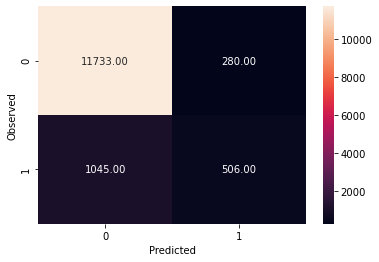

None


In [48]:
print('Confusion Matrix')
print (draw_cm(y_test, y_predict_dTreeR))

In [49]:
Recall_dTreeR = recall_score(y_test, y_predict_dTreeR)
Precision_dTreeR = precision_score(y_test, y_predict_dTreeR)
F1_score_dTreeR = f1_score(y_test, y_predict_dTreeR)
Training_accuracy_dTreeR = dTreeR.score(X_train, y_train)
Testing_accuracy_dTreeR = dTreeR.score(X_test, y_test)
ROC_dTreeR = roc_auc_score(y_test,y_predict_dTreeR)

In [50]:
Metrics_tab ['Decision Tree (pruned)'] = [Recall_dTreeR ,Precision_dTreeR, F1_score_dTreeR,
                                Training_accuracy_dTreeR,Testing_accuracy_dTreeR, ROC_dTreeR ]
Metrics_tab

,Logistic Regression,Decision Tree (pruned)
Recall,0.304320,0.326241
Precision,0.616993,0.643766
F1_score,0.407599,0.433034
Training accuracy,0.899137,0.900780
Testing accuracy,0.898850,0.902315
ROC Auc Score,0.639965,0.651467


<span style = 'color:Purple'> We can see that the recall, precision and F1_scores have been improved along with ROC score. 
The accuracy has also increased slightly. 
    
<span style = 'color:Purple'> I have tested 'entropy' method but 'gini' seems to give the best with max_depth of 3. 

#### Bagging

In [584]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier( n_estimators=50, random_state=1)
bag= bag.fit(X_train, y_train)

In [585]:
y_predict_bag = bag.predict(X_test)

In [586]:
Results['Predicted - Bagging'] = y_predict_bag

In [587]:
def draw_cm(actual, predicted):
    cm=confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot=True, fmt ='0.2f')
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Confusion Matrix


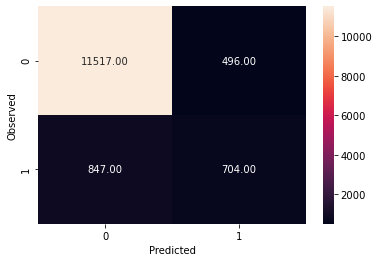

None


In [588]:
print ('Confusion Matrix')
print (draw_cm(y_test, y_predict_bag))

In [589]:
Recall_bag = recall_score(y_test, y_predict_bag)
Precision_bag = precision_score(y_test, y_predict_bag)
F1_score_bag = f1_score(y_test, y_predict_bag)
Training_accuracy_bag = bag.score(X_train, y_train)
Testing_accuracy_bag = bag.score(X_test, y_test)
ROC_bag = roc_auc_score(y_test,y_predict_bag)

In [590]:
Metrics_tab ['Bagging'] = [Recall_bag ,Precision_bag, F1_score_bag,
                                Training_accuracy_bag,Testing_accuracy_bag, ROC_bag ]
Metrics_tab

,Logistic Regression,Decision Tree (pruned),Bagging
Recall,0.304320,0.326241,0.453901
Precision,0.616993,0.643766,0.586667
F1_score,0.407599,0.433034,0.511814
Training accuracy,0.899137,0.900780,0.999684
Testing accuracy,0.898850,0.902315,0.900988
ROC Auc Score,0.639965,0.651467,0.706306


<span style = 'color:Purple'> Bagging has increased recall and ROC score but decreased precision score. The accuracy remains almost the same.

#### AdaBoosting

In [591]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=10, random_state=1)
adaboost = adaboost.fit(X_train, y_train)

In [592]:
y_predict_adaboost = adaboost.predict(X_test)
Results['Predicted-AdaBoost'] = y_predict_adaboost

Confusion Matrix
None


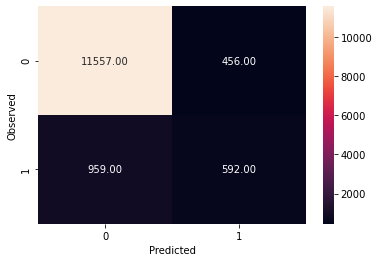

In [593]:
def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot=True, fmt='0.2f')
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show
print ('Confusion Matrix')
print (draw_cm(y_test, y_predict_adaboost))

In [594]:
Recall_adab = recall_score(y_test, y_predict_adaboost)
Precision_adab = precision_score(y_test, y_predict_adaboost)
F1_score_adab = f1_score(y_test, y_predict_adaboost)
Training_accuracy_adab = adaboost.score(X_train, y_train)
Testing_accuracy_adab = adaboost.score(X_test, y_test)
ROC_adab = roc_auc_score(y_test,y_predict_adaboost)

In [595]:
Metrics_tab ['AdaBoost'] = [Recall_adab ,Precision_adab, F1_score_adab,
                                Training_accuracy_adab,Testing_accuracy_adab, ROC_adab ]
Metrics_tab

,Logistic Regression,Decision Tree (pruned),Bagging,AdaBoost
Recall,0.304320,0.326241,0.453901,0.381689
Precision,0.616993,0.643766,0.586667,0.564885
F1_score,0.407599,0.433034,0.511814,0.455560
Training accuracy,0.899137,0.900780,0.999684,0.895978
Testing accuracy,0.898850,0.902315,0.900988,0.895680
ROC Auc Score,0.639965,0.651467,0.706306,0.671865


<span style = 'color:Purple'> AdaBoost has decreased all the scores.

#### Gradient Boosting

In [596]:
from sklearn.ensemble import GradientBoostingClassifier
gradboost = GradientBoostingClassifier(n_estimators = 50, random_state=1)
gradboost = gradboost.fit(X_train,y_train)

In [597]:
y_predict_gradboost = gradboost.predict(X_test)
Results['Predicted-GradientBoost'] = y_predict_gradboost

Confusion Matrix


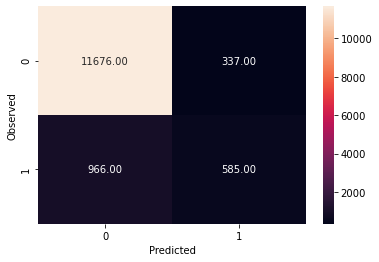

None


In [598]:
def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot=True, fmt='0.2f')
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()
print('Confusion Matrix')
print (draw_cm(y_test, y_predict_gradboost))

In [599]:
Recall_gradb = recall_score(y_test, y_predict_gradboost)
Precision_gradb = precision_score(y_test, y_predict_gradboost)
F1_score_gradb = f1_score(y_test, y_predict_gradboost)
Training_accuracy_gradb = gradboost.score(X_train, y_train)
Testing_accuracy_gradb = gradboost.score(X_test, y_test)
ROC_gradb = roc_auc_score(y_test,y_predict_gradboost)

In [600]:
Metrics_tab ['GradientBoost'] = [Recall_gradb ,Precision_gradb, F1_score_gradb,
                                Training_accuracy_gradb,Testing_accuracy_gradb,ROC_gradb]
Metrics_tab

,Logistic Regression,Decision Tree (pruned),Bagging,AdaBoost,GradientBoost
Recall,0.304320,0.326241,0.453901,0.381689,0.377176
Precision,0.616993,0.643766,0.586667,0.564885,0.634490
F1_score,0.407599,0.433034,0.511814,0.455560,0.473110
Training accuracy,0.899137,0.900780,0.999684,0.895978,0.904983
Testing accuracy,0.898850,0.902315,0.900988,0.895680,0.903937
ROC Auc Score,0.639965,0.651467,0.706306,0.671865,0.674562


<span style = 'color:Purple'> Gradient boosting has done better in improving precision and accuracy as compared to AdaBoost. 

#### Random Forest

In [601]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, random_state=1, max_features=10)
rf = rf.fit(X_train, y_train)

In [602]:
y_predict_rf = rf.predict(X_test)
Results['Predicted RandomForest'] = y_predict_rf

Confusion Matrix


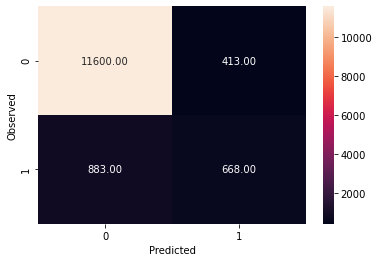

None


In [603]:
def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot=True, fmt='0.2f')
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()
print('Confusion Matrix')
print (draw_cm(y_test, y_predict_rf))

In [604]:
Recall_rf = recall_score(y_test, y_predict_rf)
Precision_rf = precision_score(y_test, y_predict_rf)
F1_score_rf = f1_score(y_test, y_predict_rf)
Training_accuracy_rf = rf.score(X_train, y_train)
Testing_accuracy_rf = rf.score(X_test, y_test)
ROC_rf = roc_auc_score(y_test,y_predict_rf)

In [605]:
Metrics_tab ['Random Forest'] = [Recall_rf ,Precision_rf, F1_score_rf,
                                Training_accuracy_rf,Testing_accuracy_rf, ROC_rf ]

In [606]:
print ('Comparison of the results from all the tested algorithms: ')
Results

Comparison of the results from all the tested algorithms: 


,Observed Target,Predicted - Logistic,Predicted - Decision Tree,Predicted - Bagging,Predicted-AdaBoost,Predicted-GradientBoost,Predicted RandomForest
3610,0,0,0,0,0,0,0
11677,0,0,0,0,0,0,0
33018,0,0,1,0,0,0,0
44323,1,1,1,1,1,1,1
8119,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
10811,0,0,0,0,0,0,0
28752,0,0,0,0,0,0,0
22657,0,0,0,0,0,0,0
12529,0,0,0,0,0,0,0


In [607]:
print ('Comparison of the results of different metrics from all the tested algorithms: ')
Metrics_tab

Comparison of the results of different metrics from all the tested algorithms: 


,Logistic Regression,Decision Tree (pruned),Bagging,AdaBoost,GradientBoost,Random Forest
Recall,0.304320,0.326241,0.453901,0.381689,0.377176,0.430690
Precision,0.616993,0.643766,0.586667,0.564885,0.634490,0.617946
F1_score,0.407599,0.433034,0.511814,0.455560,0.473110,0.507599
Training accuracy,0.899137,0.900780,0.999684,0.895978,0.904983,0.999684
Testing accuracy,0.898850,0.902315,0.900988,0.895680,0.903937,0.904453
ROC Auc Score,0.639965,0.651467,0.706306,0.671865,0.674562,0.698155


<span style = 'color: green'> In this case, we have tested 6 models/algorithms. The testing accuracy is around 90% with the highest of 90.45% in Random Forest model. 

<span style = 'color: green'> The best model for our case study is Random Forest algorithm with a precision of 62%, recall of 43%, accuracy of 90.4% and ROC Auc Score of 0.7.
    
<span style = 'color: green'> As our goal here is to reach potential customers, we do not care about False Negatives because even if our model predicts negative(zeros), the customers have already subscribed. Hence it does not affect us much. However, we need to reduce False Positives because if our model predicts positive and we do not contact them then we might be losing potential customers. Hence precision is the key factor here. Even though the highest precision is seen in Decision Tree (pruned), if we look at overall scores, the **Random Forest** model seems to be the best and more stable. 